# Analyze the result of the model training

## Loading the data

In [25]:
import pickle
import numpy as np
import tensorflow as tf
import seaborn as sns
import time
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
with open('../../data/pickle/train_x.pickle', "rb") as f:
    train_x = pickle.load(f)
train_x.shape

(15257, 150, 150, 3)

In [3]:
with open('../../data/pickle/train_y.pickle', "rb") as f:
    train_y = pickle.load(f)
train_y.shape

(15257, 8)

In [4]:
with open('../../data/pickle/val_x.pickle', "rb") as f:
    val_x = pickle.load(f)
val_x.shape

(4768, 150, 150, 3)

In [5]:
with open('../../data/pickle/val_y.pickle', "rb") as f:
    val_y = pickle.load(f)
val_y.shape

(4768, 8)

In [6]:
with open('../../data/pickle/test_x.pickle', "rb") as f:
    test_x = pickle.load(f)
test_x.shape

(3815, 150, 150, 3)

In [7]:
with open('../../data/pickle/test_y.pickle', "rb") as f:
    test_y = pickle.load(f)
test_y.shape

(3815, 8)

## Evaluate the model MobileNetV2

In [8]:
model = tf.keras.models.load_model('../../mobilenetv2.h')

2023-02-11 16:04:53.348317: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-11 16:04:53.348493: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-11 16:04:53.348524: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-02-11 16:04:53.348548: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-02-11 16:04:53.348570: W tensorflow/c

In [27]:
def get_matrix(x, y):
    x_pred = []
    y_true = []
    start = time.time()

    for index, data in enumerate(x):
        pred = model.predict(data[np.newaxis, ...])
        x_pred.append(np.argmax(pred[0], axis=- 1))
        y_true.append(np.argmax(y[index], axis=- 1))

    end = time.time()
    average_inference = (end - start) / len(x)
    return x_pred, y_true, average_inference

In [36]:
y_train_pred, y_train_true, train_average_inference = get_matrix(train_x, train_y)
y_test_pred, y_test_true, test_average_inference = get_matrix(test_x, test_y)

1/1 [==============================] - 0s 26ms/step


### Train data results

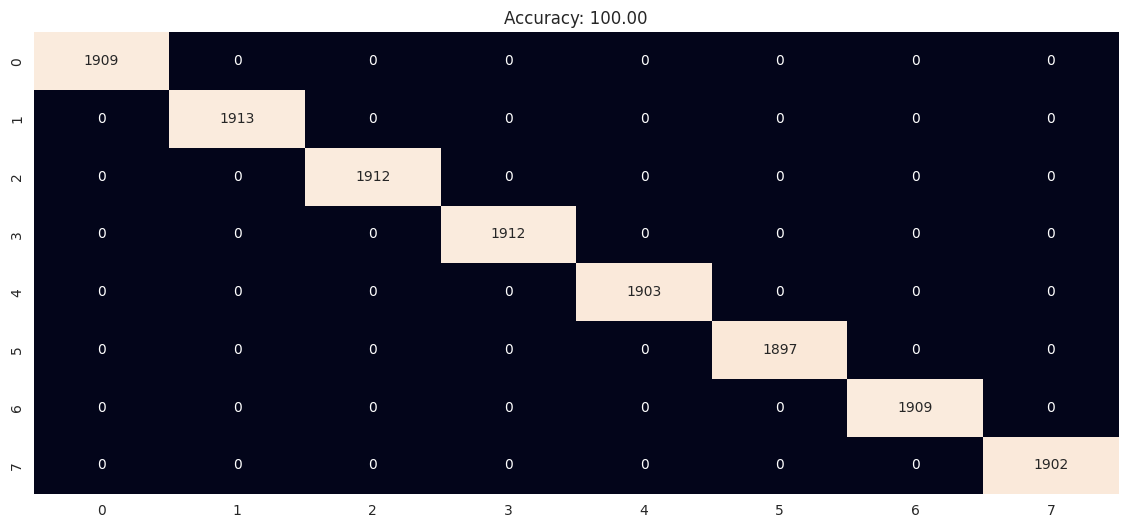

In [37]:
fig = plt.figure(figsize=(14, 6))
sns.heatmap(confusion_matrix(y_train_true, y_train_true),
            annot=True, cbar=False, fmt='d')
plt.title(f'Accuracy: {accuracy_score(y_train_true, y_train_true) * 100:2.2f}')
plt.show()

In [38]:
print(f"{train_average_inference * 1000:.2f} ms")

58.46 ms


### Test data results

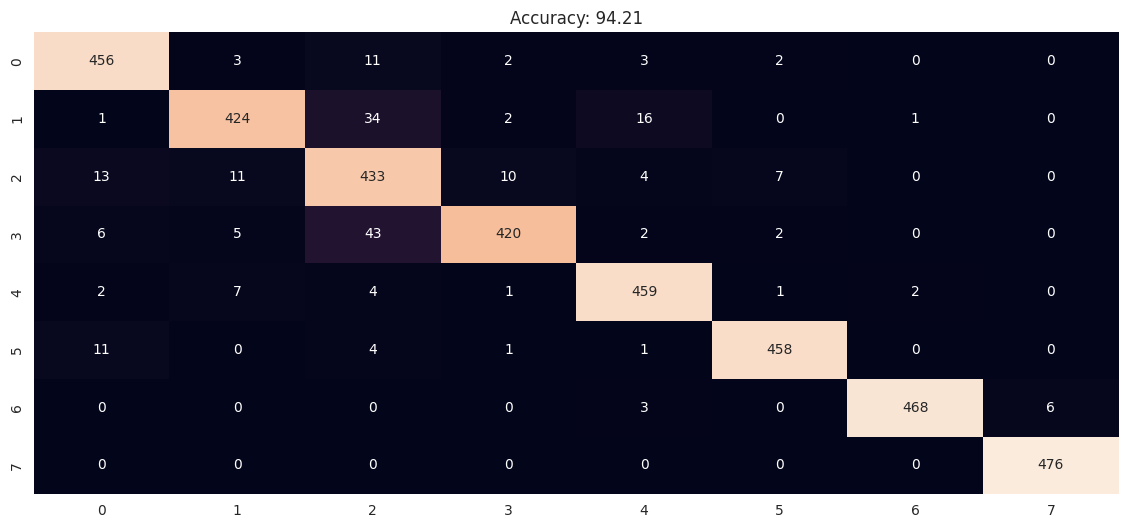

In [29]:
fig = plt.figure(figsize=(14, 6))
sns.heatmap(confusion_matrix(y_test_true, y_test_pred),
            annot=True, cbar=False, fmt='d')
plt.title(f'Accuracy: {accuracy_score(y_test_true, y_test_pred) * 100:2.2f}')
plt.show()

In [35]:
print(f"{test_average_inference * 1000:.2f} ms")

50.58 ms


## Evaluate the model ResNet50V2

In [ ]:
model = tf.keras.models.load_model('../../resnet50v2.h')